# Predicting Graduate Starting Salaries

**Author**: Nicholas Proietti

**Date Created**: Feb 18, 2025  
**Last Updated**: Feb 28, 2025  

---

## Project Purpose

Build a regression model to predict a graduate's starting salary based on key factors from their education, skills, and extracurricular activities.

---

## Dataset Description

This dataset explores the relationship between academic performance and career success. It includes 5000 records of students’ educational backgrounds, skills, and career outcomes.

**Link to Dataset**: [Education and Career Success](https://www.kaggle.com/datasets/adilshamim8/education-and-career-success/data)


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Data Exploration

In [111]:
# Open the notebook
df = pd.read_csv('education_career_success.csv')

print(df['University_GPA'].min())
print(df['University_GPA'].max())

# Show the dataframe
df.head()

2.0
4.0


,Student_ID,Age,Gender,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Field_of_Study,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,Networking_Score,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Current_Job_Level,Work_Life_Balance,Entrepreneurship
0,S00001,24,Male,3.58,1052,291,3.96,Arts,3,7,2,9,8,5,27200.0,4,5,Entry,7,No
1,S00002,21,Other,2.52,1211,112,3.63,Law,4,7,3,8,1,4,25000.0,1,1,Mid,7,No
2,S00003,28,Female,3.42,1193,715,2.63,Medicine,4,8,1,1,9,0,42400.0,9,3,Entry,7,No
3,S00004,25,Male,2.43,1497,170,2.81,Computer Science,3,9,1,10,6,1,57400.0,7,5,Mid,5,No
4,S00005,22,Male,2.08,1012,599,2.48,Engineering,4,6,4,10,9,4,47600.0,9,5,Entry,2,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Student_ID             5000 non-null   object 
 1   Age                    5000 non-null   int64  
 2   Gender                 5000 non-null   object 
 3   High_School_GPA        5000 non-null   float64
 4   SAT_Score              5000 non-null   int64  
 5   University_Ranking     5000 non-null   int64  
 6   University_GPA         5000 non-null   float64
 7   Field_of_Study         5000 non-null   object 
 8   Internships_Completed  5000 non-null   int64  
 9   Projects_Completed     5000 non-null   int64  
 10  Certifications         5000 non-null   int64  
 11  Soft_Skills_Score      5000 non-null   int64  
 12  Networking_Score       5000 non-null   int64  
 13  Job_Offers             5000 non-null   int64  
 14  Starting_Salary        5000 non-null   float64
 15  Care

In [7]:
df.describe()

,Age,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,Networking_Score,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Work_Life_Balance
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,23.442200,2.996978,1253.832000,504.335600,3.020028,1.982200,4.562800,2.512200,5.546000,5.538000,2.488800,50563.540000,5.578000,3.015800,5.482400
std,3.473712,0.575673,203.228954,291.060011,0.576047,1.408219,2.872927,1.703183,2.851159,2.850084,1.711859,14494.958207,2.871997,1.417446,2.883427
min,18.000000,2.000000,900.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25000.000000,1.000000,1.000000,1.000000
25%,20.000000,2.500000,1076.000000,256.000000,2.520000,1.000000,2.000000,1.000000,3.000000,3.000000,1.000000,40200.000000,3.000000,2.000000,3.000000
50%,23.000000,2.990000,1257.000000,501.500000,3.030000,2.000000,5.000000,3.000000,6.000000,6.000000,2.000000,50300.000000,6.000000,3.000000,6.000000
75%,26.000000,3.500000,1432.000000,759.000000,3.510000,3.000000,7.000000,4.000000,8.000000,8.000000,4.000000,60500.000000,8.000000,4.000000,8.000000
max,29.000000,4.000000,1600.000000,1000.000000,4.000000,4.000000,9.000000,5.000000,10.000000,10.000000,5.000000,101000.000000,10.000000,5.000000,10.000000


In [8]:
df.duplicated().sum()

0

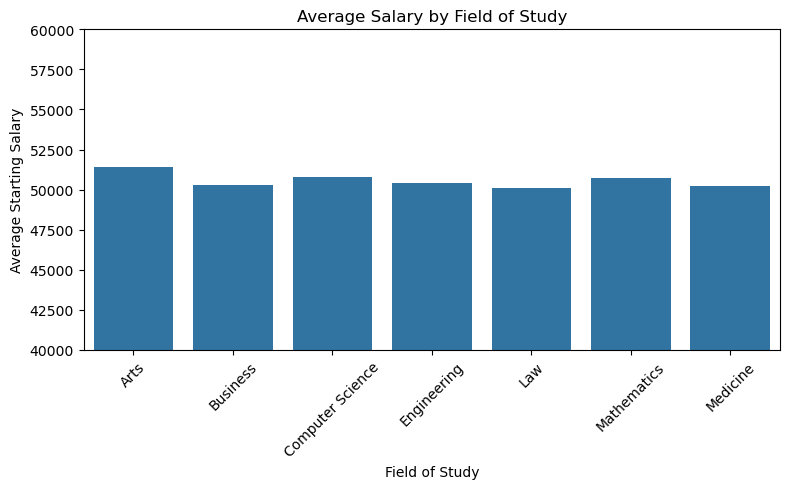

In [9]:
# Bar plot of average Starting_Salary by Field_of_Study
plt.figure(figsize=(8, 5))
avg_salary_by_field = df.groupby("Field_of_Study")["Starting_Salary"].mean().reset_index()

sns.barplot(data=avg_salary_by_field, x="Field_of_Study", y="Starting_Salary")
plt.xticks(rotation=45)  # Rotate labels if needed
plt.title("Average Salary by Field of Study")
plt.ylabel("Average Starting Salary")
plt.xlabel("Field of Study")
plt.ylim(40000, 60000)
plt.tight_layout()
plt.show()


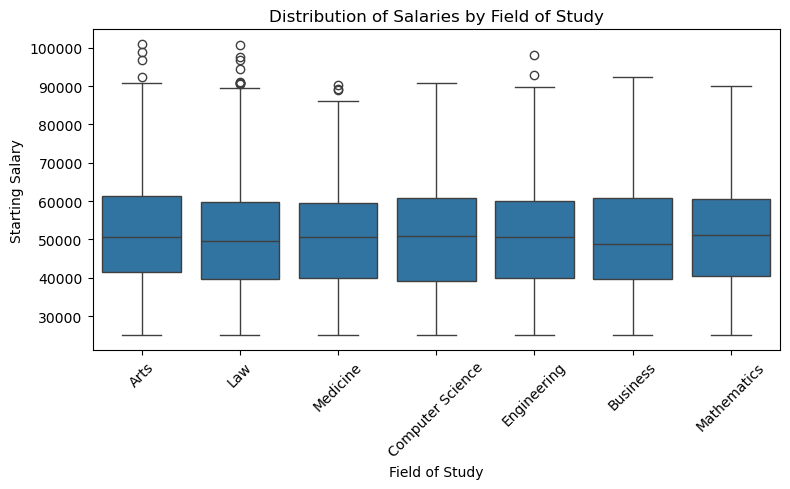

In [10]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Field_of_Study", y="Starting_Salary")
plt.xticks(rotation=45)
plt.title("Distribution of Salaries by Field of Study")
plt.ylabel("Starting Salary")
plt.xlabel("Field of Study")
plt.tight_layout()
plt.show()


In [11]:
# Compute correlation matrix for selected variables
correlation_vars = [
    "Starting_Salary", "University_GPA", "Internships_Completed",
    "Certifications", "Soft_Skills_Score", "Networking_Score",
    "University_Ranking"
]
correlation_matrix = df[correlation_vars].corr()

correlation_matrix

,Starting_Salary,University_GPA,Internships_Completed,Certifications,Soft_Skills_Score,Networking_Score,University_Ranking
Starting_Salary,1.000000,0.001022,0.018080,-0.018367,0.004870,0.002622,0.021368
University_GPA,0.001022,1.000000,-0.004300,0.013369,-0.009201,0.006803,-0.004471
Internships_Completed,0.018080,-0.004300,1.000000,0.023569,0.034905,0.004430,-0.022563
Certifications,-0.018367,0.013369,0.023569,1.000000,-0.014266,-0.001476,0.018350
Soft_Skills_Score,0.004870,-0.009201,0.034905,-0.014266,1.000000,0.010198,-0.004211
Networking_Score,0.002622,0.006803,0.004430,-0.001476,0.010198,1.000000,-0.016708
University_Ranking,0.021368,-0.004471,-0.022563,0.018350,-0.004211,-0.016708,1.000000


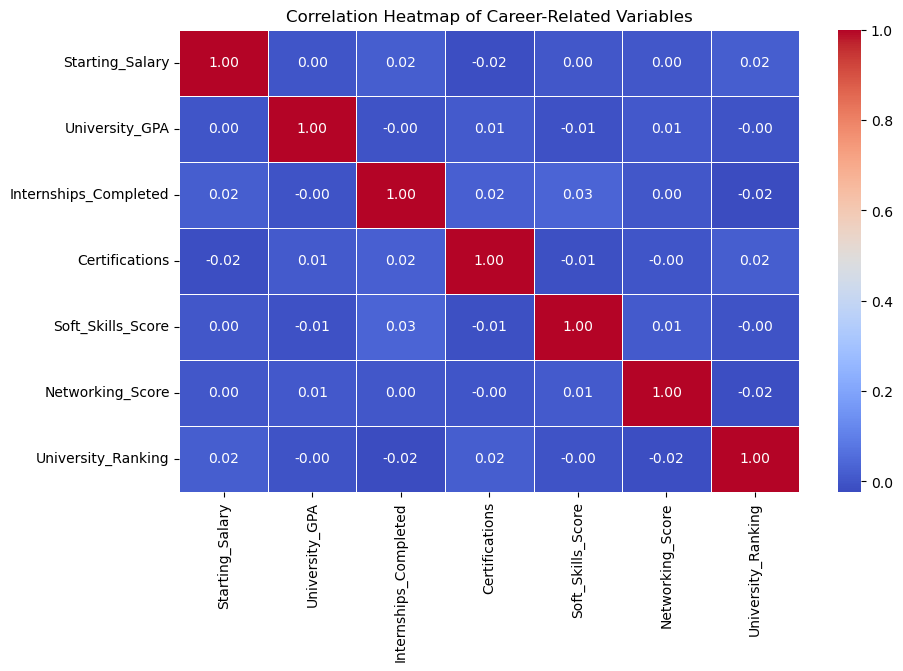

In [12]:
# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Career-Related Variables")
plt.show()

Notably, there is not a strong correlation between starting salary and the features as one would expect (e.g. strong soft skills --> higher salary).

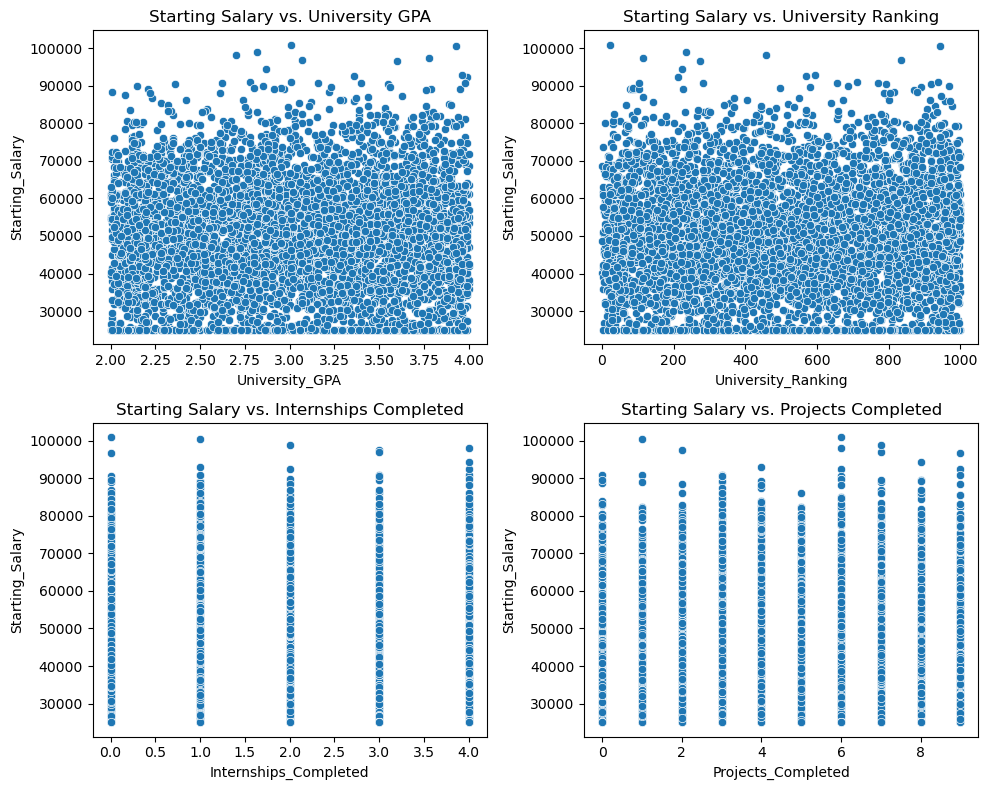

In [13]:
# Create a 2x2 grid of subplots with an appropriate figure size
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Top Left: Salary vs. University_GPA
sns.scatterplot(ax=axes[0, 0], data=df, x="University_GPA", y="Starting_Salary")
axes[0, 0].set_title("Starting Salary vs. University GPA")

# Top Right: Salary vs. University_Ranking
sns.scatterplot(ax=axes[0, 1], data=df, x="University_Ranking", y="Starting_Salary")
axes[0, 1].set_title("Starting Salary vs. University Ranking")

# Bottom Left: Salary vs. Internships_Completed
sns.scatterplot(ax=axes[1, 0], data=df, x="Internships_Completed", y="Starting_Salary")
axes[1, 0].set_title("Starting Salary vs. Internships Completed")

# Bottom Right: Salary vs. Projects_Completed (or choose another feature)
sns.scatterplot(ax=axes[1, 1], data=df, x="Projects_Completed", y="Starting_Salary")
axes[1, 1].set_title("Starting Salary vs. Projects Completed")

plt.tight_layout()
plt.show()




### Data Cleaning and Preprocessing

This section covers the steps taken to clean and preprocess the dataset to ensure it is suitable for analysis.

#### Encoding

To prepare categorical variables for machine learning models, we applied the following encoding techniques:

- **Student ID**: Assigned a unique numerical identifier.
- **Gender**: Converted into numerical and binary variables:
  - `Gender_Num`: 0 = Female, 1 = Male, 2 = Other.
  - `Male`: 1 if Male, 0 otherwise.
  - `Other`: 1 if Other, 0 otherwise.
- **Field of Study**: Encoded as both numerical and binary:
  - `Field_of_Study_Num`: Assigned a unique number to each field.
  - Created binary variables for each field (e.g., `Business = 1` if Business, else `0`).
- **Current Job Level**: Mapped to numerical values.
- **Entrepreneurship**: Converted into a binary indicator (1 = Yes, 0 = No).


In [15]:
# Encode Student_ID with a unique index
df["Student_ID_Num"] = range(1, len(df) + 1)
# Display gender-related columns for rows 3000 to 3010
print(df.loc[3000:3010, ["Student_ID","Student_ID_Num"]])

     Student_ID  Student_ID_Num
3000     S03001            3001
3001     S03002            3002
3002     S03003            3003
3003     S03004            3004
3004     S03005            3005
3005     S03006            3006
3006     S03007            3007
3007     S03008            3008
3008     S03009            3009
3009     S03010            3010
3010     S03011            3011


In [16]:
# Encode Gender
gender_mapping = {"Female": 0, "Male": 1, "Other": 2}
df["Gender_Num"] = df["Gender"].map(gender_mapping)
# Display gender-related columns for rows 3000 to 3010
print(df.loc[3000:3010, ["Gender","Gender_Num"]])

      Gender  Gender_Num
3000  Female           0
3001    Male           1
3002  Female           0
3003  Female           0
3004    Male           1
3005    Male           1
3006    Male           1
3007    Male           1
3008  Female           0
3009  Female           0
3010    Male           1


In [17]:
# Create binary gender variables
df["Male"] = (df["Gender_Num"] == 1).astype(int)
df["Other"] = (df["Gender_Num"] == 2).astype(int)
# Display gender-related columns for rows 3000 to 3010
print(df.loc[3000:3010, ["Gender","Gender_Num", "Male", "Other"]])


      Gender  Gender_Num  Male  Other
3000  Female           0     0      0
3001    Male           1     1      0
3002  Female           0     0      0
3003  Female           0     0      0
3004    Male           1     1      0
3005    Male           1     1      0
3006    Male           1     1      0
3007    Male           1     1      0
3008  Female           0     0      0
3009  Female           0     0      0
3010    Male           1     1      0


In [18]:
# Create a mapping for Field_of_Study
field_mapping = {
    "Arts": 0,
    "Business": 1,
    "Computer Science": 2,
    "Engineering": 3,
    "Law": 4,
    "Mathematics": 5,
    "Medicine": 6
}

# Apply mapping
df["Field_of_Study_Num"] = df["Field_of_Study"].map(field_mapping)

# Create binary field of study variables
for field in field_mapping.keys():
    df[field.replace(" ", "_")] = (df["Field_of_Study"] == field).astype(int)

print(df.loc[3000:3010, ["Field_of_Study", "Field_of_Study_Num", "Arts", "Business", 
                         "Computer_Science", "Engineering", "Law", "Mathematics", "Medicine"]])


        Field_of_Study  Field_of_Study_Num  Arts  Business  Computer_Science  \
3000              Arts                   0     1         0                 0   
3001       Engineering                   3     0         0                 0   
3002       Engineering                   3     0         0                 0   
3003          Medicine                   6     0         0                 0   
3004       Mathematics                   5     0         0                 0   
3005  Computer Science                   2     0         0                 1   
3006          Medicine                   6     0         0                 0   
3007          Business                   1     0         1                 0   
3008       Engineering                   3     0         0                 0   
3009       Mathematics                   5     0         0                 0   
3010              Arts                   0     1         0                 0   

      Engineering  Law  Mathematics  Me

In [19]:
# Encode Current_Job_Level
job_level_mapping = {"Entry": 0, "Mid": 1, "Senior": 2}
df["Current_Job_Level_Num"] = df["Current_Job_Level"].map(job_level_mapping)
print(df.loc[3000:3010, ["Current_Job_Level","Current_Job_Level_Num"]])

     Current_Job_Level  Current_Job_Level_Num
3000               Mid                    1.0
3001               Mid                    1.0
3002            Senior                    2.0
3003               Mid                    1.0
3004            Senior                    2.0
3005               Mid                    1.0
3006             Entry                    0.0
3007             Entry                    0.0
3008             Entry                    0.0
3009             Entry                    0.0
3010             Entry                    0.0


In [20]:
# Encode Entrepreneurship as binary
df["Entrepreneurship_Num"] = df["Entrepreneurship"].map({"No": 0, "Yes": 1})
print(df.loc[3000:3010, ["Entrepreneurship","Entrepreneurship_Num"]])

     Entrepreneurship  Entrepreneurship_Num
3000              Yes                     1
3001               No                     0
3002               No                     0
3003               No                     0
3004               No                     0
3005               No                     0
3006               No                     0
3007               No                     0
3008              Yes                     1
3009               No                     0
3010               No                     0


In [21]:
# Select relevant columns
columns_to_summarize = [
    "Student_ID_Num", "Gender_Num", "Male", "Other", 
    "Field_of_Study_Num", "Arts", "Business", "Computer_Science", 
    "Engineering", "Law", "Mathematics", "Medicine", 
    "Current_Job_Level_Num", "Entrepreneurship_Num"
]

# Generate summary statistics
summary = df[columns_to_summarize].describe().T[["count", "mean", "std", "min", "max"]]

# Rename columns for clarity
summary.rename(columns={"count": "Obs", "mean": "Mean", "std": "Std. Dev.", "min": "Min", "max": "Max"}, inplace=True)

summary


,Obs,Mean,Std. Dev.,Min,Max
Student_ID_Num,5000.0,2500.500000,1443.520003,1.0,5000.0
Gender_Num,5000.0,0.568400,0.567614,0.0,2.0
Male,5000.0,0.491600,0.499979,0.0,1.0
Other,5000.0,0.038400,0.192179,0.0,1.0
Field_of_Study_Num,5000.0,2.985800,2.009877,0.0,6.0
Arts,5000.0,0.149800,0.356911,0.0,1.0
Business,5000.0,0.143800,0.350922,0.0,1.0
Computer_Science,5000.0,0.134000,0.340686,0.0,1.0
Engineering,5000.0,0.140200,0.347229,0.0,1.0
Law,5000.0,0.145400,0.352539,0.0,1.0


### Independent and dependent variables

In [23]:
# Summary statistics including percentiles
percentiles = [0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]
summary_stats = df["Starting_Salary"].describe(percentiles).T
summary_stats["Variance"] = df["Starting_Salary"].var()
summary_stats["Skewness"] = df["Starting_Salary"].skew()
summary_stats["Kurtosis"] = df["Starting_Salary"].kurt()
summary_stats

count       5.000000e+03
mean        5.056354e+04
std         1.449496e+04
min         2.500000e+04
1%          2.500000e+04
5%          2.529500e+04
10%         3.110000e+04
25%         4.020000e+04
50%         5.030000e+04
75%         6.050000e+04
90%         6.990000e+04
95%         7.500000e+04
99%         8.490200e+04
max         1.010000e+05
Variance    2.101038e+08
Skewness    2.066588e-01
Kurtosis   -3.849961e-01
Name: Starting_Salary, dtype: float64

In [24]:
# Frequency table for starting_salary
freq_table = df["Starting_Salary"].value_counts().reset_index()
freq_table.columns = ["Starting_Salary", "Freq"]
freq_table["Percent"] = (freq_table["Freq"] / freq_table["Freq"].sum()) * 100
freq_table["Cum_Percent"] = freq_table["Percent"].cumsum()
freq_table

,Starting_Salary,Freq,Percent,Cum_Percent
0,25000.0,240,4.80,4.80
1,52000.0,24,0.48,5.28
2,54400.0,24,0.48,5.76
3,53200.0,23,0.46,6.22
4,45500.0,21,0.42,6.64
...,...,...,...,...
618,78800.0,1,0.02,99.92
619,90600.0,1,0.02,99.94
620,82800.0,1,0.02,99.96
621,97500.0,1,0.02,99.98


In [25]:
# Create binary variable: 1 if Starting_Salary > 25000, else 0
df["Binary_Starting_Salary"] = (df["Starting_Salary"] > 25000).astype(int)

# Frequency table for binary variable
binary_freq_table = df["Binary_Starting_Salary"].value_counts().reset_index()
binary_freq_table.columns = ["Binary_Starting_Salary", "Freq"]
binary_freq_table["Percent"] = (binary_freq_table["Freq"] / binary_freq_table["Freq"].sum()) * 100
binary_freq_table["Cum_Percent"] = binary_freq_table["Percent"].cumsum()
binary_freq_table

,Binary_Starting_Salary,Freq,Percent,Cum_Percent
0,1,4760,95.2,95.2
1,0,240,4.8,100.0


In [26]:
# Define variables of interest
variables = [
    "Starting_Salary", "University_GPA", "Arts", "Business", "Computer_Science",
    "Engineering", "Law", "Mathematics", "Medicine", "Internships_Completed",
    "Projects_Completed", "Certifications", "Soft_Skills_Score",
    "Networking_Score", "Age", "Male", "Other", "High_School_GPA",
    "SAT_Score", "University_Ranking"
]

# Compute summary statistics
summary_stats = df[variables].describe().T[["count", "mean", "std", "min", "max"]]

# Rename columns for readability
summary_stats.rename(columns={"count": "Obs", "mean": "Mean", "std": "Std. Dev.", "min": "Min", "max": "Max"}, inplace=True)

summary_stats

,Obs,Mean,Std. Dev.,Min,Max
Starting_Salary,5000.0,50563.540000,14494.958207,25000.0,101000.0
University_GPA,5000.0,3.020028,0.576047,2.0,4.0
Arts,5000.0,0.149800,0.356911,0.0,1.0
Business,5000.0,0.143800,0.350922,0.0,1.0
Computer_Science,5000.0,0.134000,0.340686,0.0,1.0
Engineering,5000.0,0.140200,0.347229,0.0,1.0
Law,5000.0,0.145400,0.352539,0.0,1.0
Mathematics,5000.0,0.149000,0.356124,0.0,1.0
Medicine,5000.0,0.137800,0.344724,0.0,1.0
Internships_Completed,5000.0,1.982200,1.408219,0.0,4.0


In [27]:
# Cross-tabulation of Field of Study and Gender
field_gender_table = pd.crosstab(df["Field_of_Study_Num"], df["Gender_Num"], margins=True)

# Rename columns to match categories
field_gender_table.columns = ["Female", "Male", "Other", "Total"]
field_gender_table.index = [
    "Arts", "Business", "Computer Science", "Engineering", "Law",
    "Mathematics", "Medicine", "Total"
]

field_gender_table

,Female,Male,Other,Total
Arts,357,370,22,749
Business,330,364,25,719
Computer Science,314,323,33,670
Engineering,322,352,27,701
Law,361,339,27,727
Mathematics,347,365,33,745
Medicine,319,345,25,689
Total,2350,2458,192,5000


## Model Selection

### Feedforward Neural Network

In [29]:
# For evaluating models later
model_performance = {}

# ----------------------------
# Select features (X) and target (y)
# ----------------------------
feature_cols = [
    "University_GPA", "Internships_Completed", "Projects_Completed",
    "Certifications", "Soft_Skills_Score", "Networking_Score", "High_School_GPA",
    "SAT_Score", "University_Ranking"
]
X = df[feature_cols].values
y = df["Starting_Salary"].values

# ----------------------------
# 70/20/10 training testing validation split
# First, split into 70% training and 30% temporary set
# ----------------------------
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42
)

# ----------------------------
# Then, split the temporary set into 20% testing and 10% validation
# Since X_temp is 30% of the data, we split it with test_size = 0.6667 for testing (20/30) 
# and the remaining 0.3333 for validation (10/30)
# ----------------------------
X_test, X_val, y_test, y_val = train_test_split(
    X_temp, y_temp,
    test_size=0.3333,
    random_state=42
)

# ----------------------------
# Scale features
# ----------------------------
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

# ----------------------------
# Convert to torch Tensors
# ----------------------------
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)


In [30]:
class SalaryPredictor(nn.Module):
    def __init__(self, input_dim, hidden_dim=32, hidden_layers=2):
        super(SalaryPredictor, self).__init__()
        
        # 2 hidden layers with ReLU activation
        layers = []
        current_dim = input_dim
        
        for _ in range(hidden_layers):
            layers.append(nn.Linear(current_dim, hidden_dim))
            layers.append(nn.ReLU())
            current_dim = hidden_dim
        
        # Final output layer => 1 dimension for regression
        layers.append(nn.Linear(current_dim, 1))
        
        self.network = nn.Sequential(*layers)
        
    def forward(self, x):
        return self.network(x)


# Instantiate model
input_dim = X_train.shape[1]
model = SalaryPredictor(input_dim=input_dim, hidden_dim=64, hidden_layers=2)

# Move model to GPU if available 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


SalaryPredictor(
  (network): Sequential(
    (0): Linear(in_features=9, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=1, bias=True)
  )
)

In [31]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


Epoch [5/50], Train Loss: 2730218781.2571, Val Loss: 2685677213.6960
Epoch [10/50], Train Loss: 2382012143.0309, Val Loss: 2294205831.1680
Epoch [15/50], Train Loss: 1606448368.2011, Val Loss: 1492147123.2000
Epoch [20/50], Train Loss: 772926629.1566, Val Loss: 687936586.7520
Epoch [25/50], Train Loss: 336561329.9566, Val Loss: 299263394.5600
Epoch [30/50], Train Loss: 242638084.2971, Val Loss: 221397166.8480
Epoch [35/50], Train Loss: 232435423.4149, Val Loss: 212882579.7120
Epoch [40/50], Train Loss: 230576965.7417, Val Loss: 211405070.0800
Epoch [45/50], Train Loss: 229297591.6434, Val Loss: 210363649.5360
Epoch [50/50], Train Loss: 228202192.9509, Val Loss: 209597300.7360


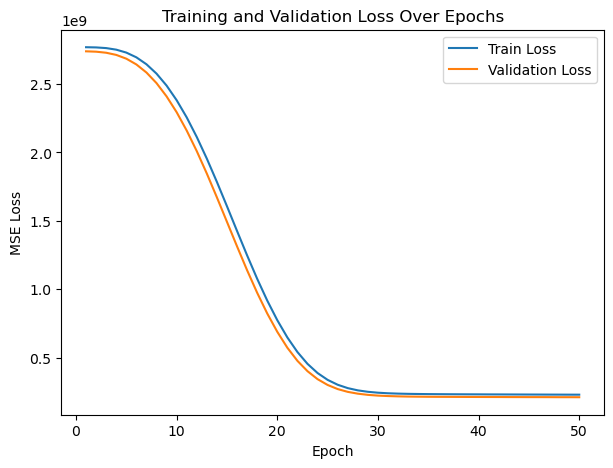

In [32]:
# Hyperparameters
num_epochs = 50
batch_size = 64

train_losses = []
val_losses = []

# Create DataLoaders (for batching)
train_data = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
val_data = torch.utils.data.TensorDataset(X_val_tensor, y_val_tensor)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size, shuffle=False)

model.train()
for epoch in range(num_epochs):
    # Training phase
    model.train()
    running_loss = 0.0
    for batch_X, batch_y in train_loader:
        batch_X = batch_X.to(device)
        batch_y = batch_y.to(device)
        
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * batch_X.size(0)
    
    epoch_train_loss = running_loss / len(train_loader.dataset)
    
    # Validation phase
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for batch_X, batch_y in val_loader:
            batch_X = batch_X.to(device)
            batch_y = batch_y.to(device)
            
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            val_loss += loss.item() * batch_X.size(0)
    
    epoch_val_loss = val_loss / len(val_loader.dataset)
    
    if (epoch + 1) % 5 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], "
              f"Train Loss: {epoch_train_loss:.4f}, "
              f"Val Loss: {epoch_val_loss:.4f}")

    train_losses.append(epoch_train_loss)
    val_losses.append(epoch_val_loss)

plt.figure(figsize=(7, 5))
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

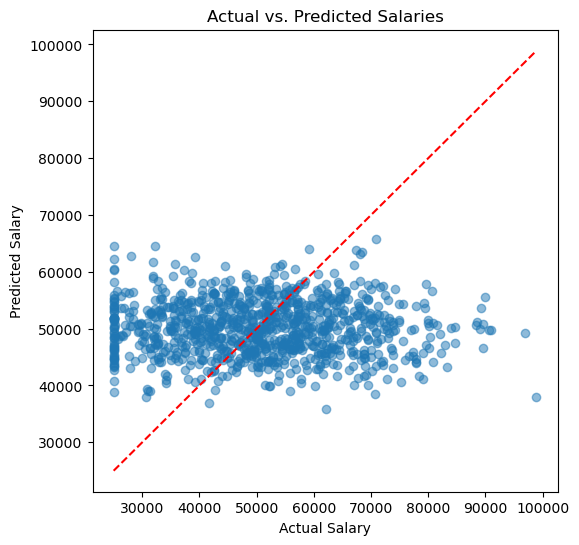

In [33]:
test_data = torch.utils.data.TensorDataset(X_test_tensor, y_test_tensor)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False)

model.eval()
preds = []
actuals = []

with torch.no_grad():
    for batch_X, batch_y in test_loader:
        batch_X = batch_X.to(device)
        outputs = model(batch_X).cpu().numpy().flatten()  # predictions
        preds.extend(outputs)
        actuals.extend(batch_y.numpy().flatten())

# Convert to NumPy arrays
preds = np.array(preds)
actuals = np.array(actuals)

plt.figure(figsize=(6,6))
plt.scatter(actuals, preds, alpha=0.5)
plt.title("Actual vs. Predicted Salaries")
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
# Optionally plot a diagonal line for reference
min_val = min(actuals.min(), preds.min())
max_val = max(actuals.max(), preds.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--')
plt.show()


In [34]:
model.eval()
test_loss = 0.0
with torch.no_grad():
    for batch_X, batch_y in test_loader:
        batch_X = batch_X.to(device)
        batch_y = batch_y.to(device)
        
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        test_loss += loss.item() * batch_X.size(0)

test_loss /= len(test_loader.dataset)
print(f"Final Test MSE: {test_loss:.4f}")
print(f"Final Test RMSE: {test_loss**0.5:.2f}")


Final Test MSE: 241877580.6720
Final Test RMSE: 15552.41


In [35]:
# Evaluate on Validation Set
model.eval()  # set model to eval mode

val_preds = []
val_actuals = []

with torch.no_grad():
    for batch_X, batch_y in val_loader:
        batch_X = batch_X.to(device)
        outputs = model(batch_X).cpu().numpy().flatten()  # Predictions
        val_preds.extend(outputs)
        val_actuals.extend(batch_y.numpy().flatten())

val_preds = np.array(val_preds)
val_actuals = np.array(val_actuals)

val_mse = mean_squared_error(val_actuals, val_preds)
val_rmse = np.sqrt(val_mse)

print(f"Neural Network Validation RMSE: {val_rmse:.2f}")

# Store in dictionary
model_performance["Neural Network"] = val_rmse


Neural Network Validation RMSE: 14477.48


### Linear Regression

In [37]:
feature_cols = [
    "University_GPA", "Internships_Completed", "Projects_Completed",
    "Certifications", "Soft_Skills_Score", "Networking_Score",
    "High_School_GPA", "SAT_Score", "University_Ranking"
]
X = df[feature_cols].values
y = df["Starting_Salary"].values

# 70/20/10 split:

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42
)
X_test, X_val, y_test, y_val = train_test_split(
    X_temp, y_temp, test_size=0.3333, random_state=42
)

# Then scale the same three sets:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)
X_val_scaled   = scaler.transform(X_val)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
from sklearn.linear_model import LinearRegression

# Instantiate the model
lin_reg = LinearRegression()

# Train the model on the scaled training data
lin_reg.fit(X_train_scaled, y_train)


LinearRegression()

In [39]:
# Make predictions on the test set
y_pred = lin_reg.predict(X_test_scaled)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Adjusted R² calculation: adjusted_r2 = 1 - (1-R2) * (n-1)/(n-p-1)
n = X_test_scaled.shape[0]  # number of samples
p = X_test_scaled.shape[1]  # number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)
print("Adjusted R²:", adjusted_r2)

Mean Squared Error (MSE): 215449657.00834954
Root Mean Squared Error (RMSE): 14678.203466649096
Mean Absolute Error (MAE): 11906.607738757268
R² Score: -0.0022564319861215765
Adjusted R²: -0.011367854095086338


In [40]:
# Evaluate Linear Regression on the validation set
y_val_pred = lin_reg.predict(X_val_scaled)
val_mse_lin = mean_squared_error(y_val, y_val_pred)
val_rmse_lin = np.sqrt(val_mse_lin)

print(f"Linear Regression Validation RMSE: {val_rmse_lin:.2f}")

# Store in dictionary
model_performance["Linear Regression"] = val_rmse_lin


Linear Regression Validation RMSE: 13496.77


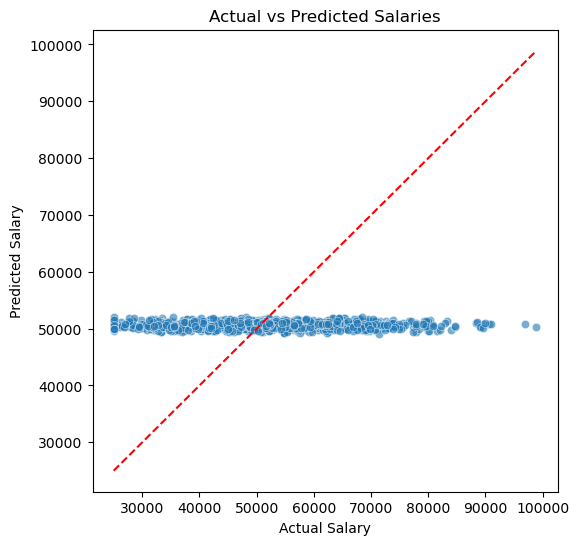

In [41]:
# Function to plot actual vs predicted values
def plot_actual_vs_predicted(y_true, y_pred, title):
    plt.figure(figsize=(6,6))
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.6)
    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())
    plt.plot([min_val, max_val], [min_val, max_val], 'r--')  # Diagonal line
    plt.xlabel("Actual Salary")
    plt.ylabel("Predicted Salary")
    plt.title(title)
    plt.show()

plot_actual_vs_predicted(y_test, y_pred, "Actual vs Predicted Salaries")

### Ridge and Lasso Regression

In [43]:
from sklearn.linear_model import Ridge, Lasso

# Instantiate models 
ridge = Ridge(alpha=1.0)  
lasso = Lasso(alpha=0.1)

# Fit the models
ridge.fit(X_train_scaled, y_train)
lasso.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_ridge = ridge.predict(X_test_scaled)
y_pred_lasso = lasso.predict(X_test_scaled)

# Define a function to compute common metrics
def evaluate_model(y_true, y_pred, X):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    n = X.shape[0]
    p = X.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    return mse, rmse, mae, r2, adjusted_r2

# Evaluate Ridge Regression
ridge_metrics = evaluate_model(y_test, y_pred_ridge, X_test_scaled)
print("Ridge Regression Metrics:")
print("MSE: {:.2f}, RMSE: {:.2f}, MAE: {:.2f}, R²: {:.3f}, Adjusted R²: {:.3f}".format(*ridge_metrics))

# Evaluate Lasso Regression
lasso_metrics = evaluate_model(y_test, y_pred_lasso, X_test_scaled)
print("\nLasso Regression Metrics:")
print("MSE: {:.2f}, RMSE: {:.2f}, MAE: {:.2f}, R²: {:.3f}, Adjusted R²: {:.3f}".format(*lasso_metrics))


Ridge Regression Metrics:
MSE: 215449430.24, RMSE: 14678.20, MAE: 11906.60, R²: -0.002, Adjusted R²: -0.011

Lasso Regression Metrics:
MSE: 215449579.16, RMSE: 14678.20, MAE: 11906.61, R²: -0.002, Adjusted R²: -0.011


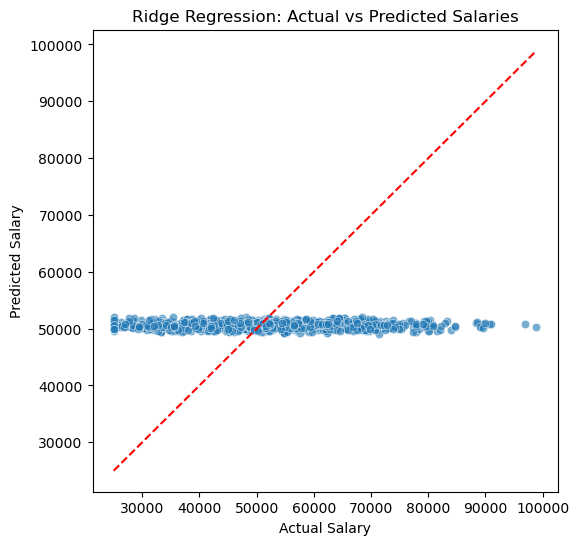

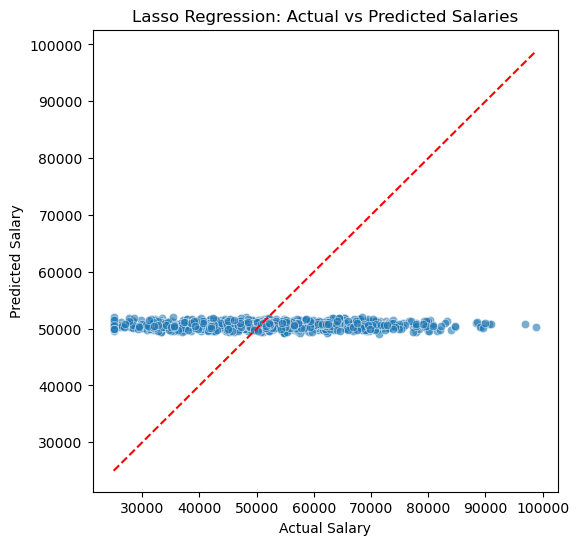

In [44]:
# Plot for Ridge Regression
plot_actual_vs_predicted(y_test, y_pred_ridge, "Ridge Regression: Actual vs Predicted Salaries")

# Plot for Lasso Regression
plot_actual_vs_predicted(y_test, y_pred_lasso, "Lasso Regression: Actual vs Predicted Salaries")


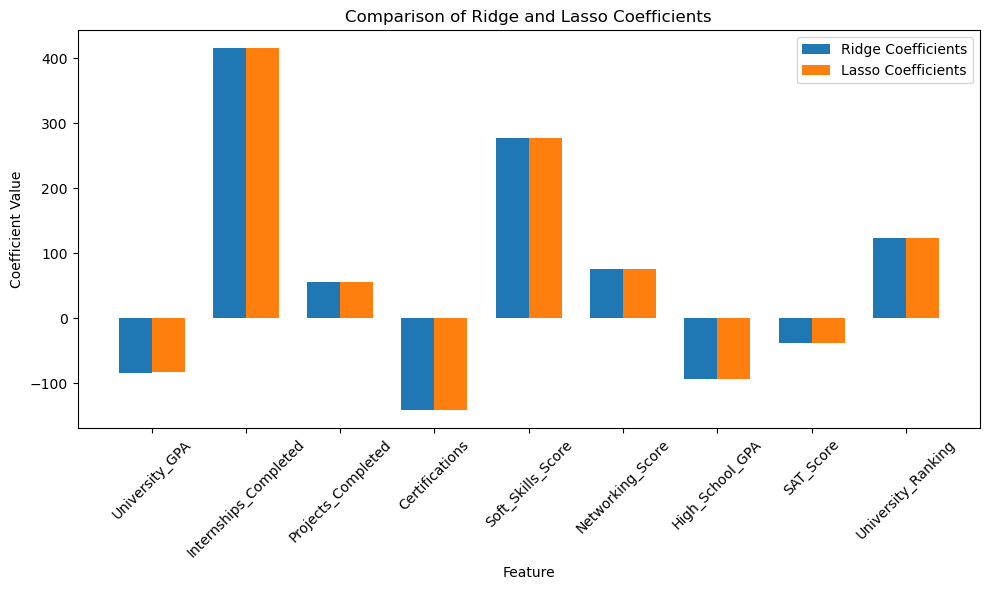

In [45]:
# Get coefficients for Ridge and Lasso
coefficients = pd.DataFrame({
    "Feature": feature_cols,
    "Ridge_Coeff": ridge.coef_,
    "Lasso_Coeff": lasso.coef_
})

# Plot the coefficients side by side
plt.figure(figsize=(10,6))
bar_width = 0.35
index = np.arange(len(feature_cols))

plt.bar(index, coefficients["Ridge_Coeff"], bar_width, label="Ridge Coefficients")
plt.bar(index + bar_width, coefficients["Lasso_Coeff"], bar_width, label="Lasso Coefficients")

plt.xlabel("Feature")
plt.ylabel("Coefficient Value")
plt.title("Comparison of Ridge and Lasso Coefficients")
plt.xticks(index + bar_width / 2, feature_cols, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


Despite the weak correlation between the target variable and all features, coefficients suggest internships
and soft skills are the strongest features.

In [46]:
# Evaluate Ridge on validation set 
y_val_pred_ridge = ridge.predict(X_val_scaled)
val_mse_ridge = mean_squared_error(y_val, y_val_pred_ridge)
val_rmse_ridge = np.sqrt(val_mse_ridge)
print(f"Ridge Validation RMSE: {val_rmse_ridge:.2f}")

model_performance["Ridge"] = val_rmse_ridge

# Evaluate Lasso on validation set 
y_val_pred_lasso = lasso.predict(X_val_scaled)
val_mse_lasso = mean_squared_error(y_val, y_val_pred_lasso)
val_rmse_lasso = np.sqrt(val_mse_lasso)
print(f"Lasso Validation RMSE: {val_rmse_lasso:.2f}")

model_performance["Lasso"] = val_rmse_lasso


Ridge Validation RMSE: 13496.77
Lasso Validation RMSE: 13496.77


### OLS Regression


In [48]:
import statsmodels.api as sm

# Create interaction term
df['top20'] = (df['University_Ranking'] <= 20).astype(int)
df['business_or_law'] = ((df['Business'] == 1) | (df['Law'] == 1)).astype(int)
df['top20_x_business_or_law'] = df['top20'] * df['business_or_law']

# Split into 70% train, 20% test, 10% validation
features = [
    "University_GPA","Business","Computer_Science","Engineering","Law",
    "Mathematics","Medicine","Internships_Completed","Projects_Completed",
    "Certifications","Soft_Skills_Score","Networking_Score","Age",
    "Male","Other","High_School_GPA","SAT_Score","University_Ranking",
    "top20_x_business_or_law"
]
X = df[features]
y = df["Starting_Salary"]

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42
)
X_test, X_val, y_test, y_val = train_test_split(
    X_temp, y_temp, test_size=0.3333, random_state=42
)

# Scale 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)
X_val_scaled   = scaler.transform(X_val)

# OLS on training, evaluate on test (20%)
X_train_scaled_const = sm.add_constant(X_train_scaled)
X_test_scaled_const  = sm.add_constant(X_test_scaled)
ols_train = sm.OLS(y_train, X_train_scaled_const).fit()

y_test_pred = ols_train.predict(X_test_scaled_const)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("Test RMSE =", rmse_test)

Test RMSE = 14701.995316080936


In [49]:
# Evaluate OLS on validation set 
X_val_scaled_const = sm.add_constant(X_val_scaled)
y_val_pred_ols = ols_train.predict(X_val_scaled_const)
val_mse_ols = mean_squared_error(y_val, y_val_pred_ols)
val_rmse_ols = np.sqrt(val_mse_ols)

print(f"OLS Validation RMSE: {val_rmse_ols:.2f}")

model_performance["OLS"] = val_rmse_ols


OLS Validation RMSE: 13532.02


### Model Comparison


Model Comparison on Validation RMSE:
Neural Network: 14477.4755
Linear Regression: 13496.7724
Ridge: 13496.7708
Lasso: 13496.7719
OLS: 13532.0221
The model with the lowest RMSE is Ridge with an RMSE of 13496.770774703176.


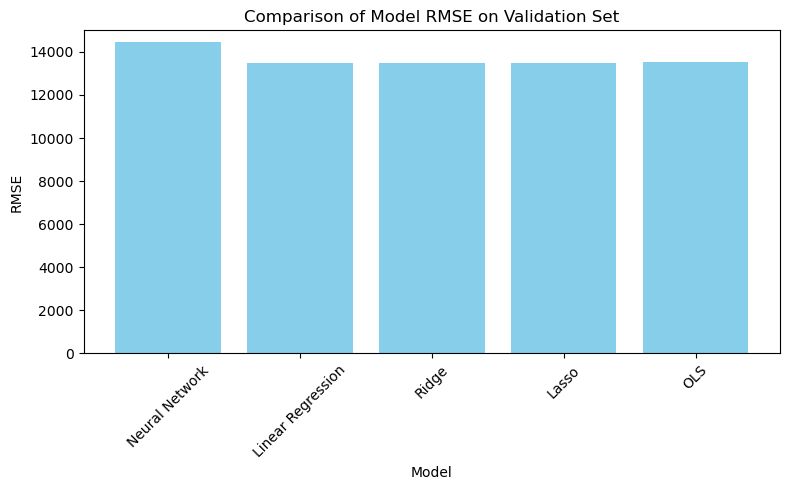

In [51]:

print("\nModel Comparison on Validation RMSE:")
for model_name, rmse_value in model_performance.items():
    print(f"{model_name}: {rmse_value:.4f}")

# Bar chart of RMSE values 
plt.figure(figsize=(8, 5))
model_names = list(model_performance.keys())
rmse_values = list(model_performance.values())

# Find the model with the lowest RMSE
min_rmse_model = model_names[rmse_values.index(min(rmse_values))]
min_rmse_value = min(rmse_values)
print(f"The model with the lowest RMSE is {min_rmse_model} with an RMSE of {min_rmse_value}.")

plt.bar(model_names, rmse_values, color='skyblue')
plt.title("Comparison of Model RMSE on Validation Set")
plt.xlabel("Model")
plt.ylabel("RMSE")
plt.ylim(0, 15000)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Final Ridge Regression Results

Ridge (Train+Val) -> Test RMSE = 14701.57

Ridge regression model in original feature units:

starting_salary =  49835.7147 + 35.3364 * University_GPA + 192.2898 * Internships_Completed + 71.4985 * Projects_Completed - 163.5358 * Certifications + 20.0284 * Soft_Skills_Score + 14.5013 * Networking_Score - 232.4205 * High_School_GPA + 0.2171 * SAT_Score + 1.1053 * University_Ranking

Final Model (Full Data) RMSE: 14482.62


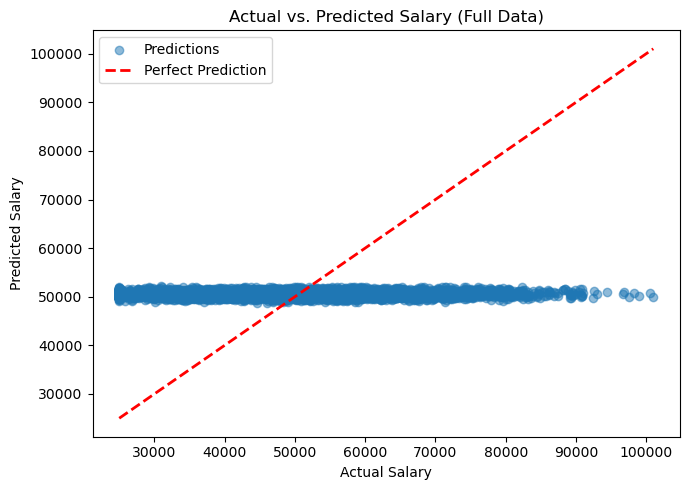

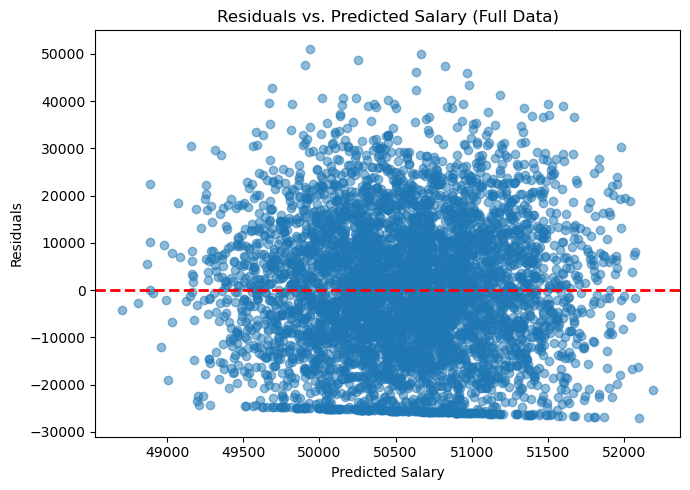

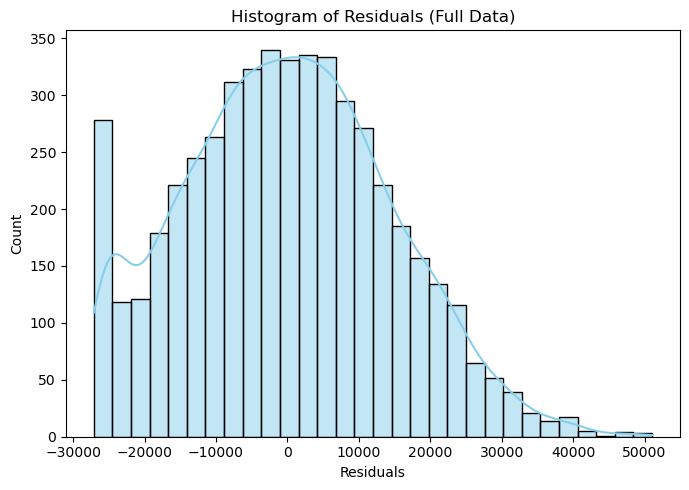

In [53]:
# Join training and validation data and retrain Ridge
X_trainval = np.concatenate([X_train_scaled, X_val_scaled], axis=0)
y_trainval = np.concatenate([y_train, y_val], axis=0)

ridge_joined = Ridge(alpha=1.0)
ridge_joined.fit(X_trainval, y_trainval)

# Evaluate on test
y_test_pred_joined = ridge_joined.predict(X_test_scaled)
mse_test_joined = mean_squared_error(y_test, y_test_pred_joined)
rmse_test_joined = np.sqrt(mse_test_joined)

print(f"Ridge (Train+Val) -> Test RMSE = {rmse_test_joined:.2f}")

# Retrain final model on full dataset
X_full = df[feature_cols].values
y_full = df["Starting_Salary"].values

scaler_full = StandardScaler()
X_full_scaled = scaler_full.fit_transform(X_full)

ridge_full = Ridge(alpha=1.0)
ridge_full.fit(X_full_scaled, y_full)

# Retrieve the coefficients/intercept from final ridge model (scaled).
coefs_scaled = ridge_full.coef_
intercept_scaled = ridge_full.intercept_

# Convert them back to original, unscaled units:
coefs_unscaled = coefs_scaled / scaler_full.scale_

# Because the intercept in Ridge is fit after scaling, we must shift it
# so it applies to the raw (unscaled) features:
intercept_unscaled = intercept_scaled - np.sum(
    coefs_scaled * (scaler_full.mean_ / scaler_full.scale_)
)

# Print the final "starting_salary = intercept + b1*x1 + b2*x2 ..." style equation
equation_str = f"starting_salary = {intercept_unscaled: .4f}"
for feature_name, c in zip(feature_cols, coefs_unscaled):
    sign_str = "+" if c >= 0 else "-"
    equation_str += f" {sign_str} {abs(c):.4f} * {feature_name}"

print("\nRidge regression model in original feature units:\n")
print(equation_str)


# Make predictions on the full dataset
y_full_pred = ridge_full.predict(X_full_scaled)
mse_full = mean_squared_error(y_full, y_full_pred)
rmse_full = np.sqrt(mse_full)

print(f"\nFinal Model (Full Data) RMSE: {rmse_full:.2f}")

# Visualizations

# Actual vs. Predicted Salaries
plt.figure(figsize=(7,5))
plt.scatter(y_full, y_full_pred, alpha=0.5, label='Predictions')
plt.plot([y_full.min(), y_full.max()], [y_full.min(), y_full.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs. Predicted Salary (Full Data)")
plt.legend()
plt.tight_layout()
plt.show()

# Residuals vs. Predicted Salaries
residuals = y_full - y_full_pred
plt.figure(figsize=(7,5))
plt.scatter(y_full_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.xlabel("Predicted Salary")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Salary (Full Data)")
plt.tight_layout()
plt.show()

# Histogram of Residuals with KDE
plt.figure(figsize=(7,5))
sns.histplot(residuals, kde=True, bins=30, color='skyblue')
plt.xlabel("Residuals")
plt.title("Histogram of Residuals (Full Data)")
plt.tight_layout()
plt.show()